## ANALYSE EXPLORATOIRE - PREDICTION PRESENCE DE MALADIE CARDIAQUE

## IMPORTATION DES LIBRAIRIES NECESSAIRES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## CHARGEMENT ET COMPREHENSION DU JEU DE DONNEES

In [3]:
data = pd.read_excel('maladie_cardiovasculaire.xlsx')

In [4]:
df = data.copy()
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [5]:
df.rename(columns={'DEPRESSION ':'DEPRESSION'}, inplace=True)
df['DEPRESSION'].head()

0    0.0
1    1.0
2    0.0
3    1.5
4    0.0
Name: DEPRESSION, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Informations sur le jeu de données :

- Notre jeu de données est composé de <strong>918 observations et de 12 variables </strong>. On remarque ici,  <strong>qu'il n'existe pas de données manquantes </strong> au niveau de notre dataset. 

- La variable cible est la variable  <strong> "COEUR"</strong>. Les autres variables (variables explicatives) seront utilisées pour prédire la présence ou l'absence de maladie cardiaques.

- Les différentes variables sont : 

<ul>
    
<li><strong>AGE :</strong> age du patient </li><br>
    
<li><strong>SEXE :</strong> sexe du patient [homme, femme]</li><br>
    
<li><strong>TDT :</strong> type de douleur thoracique [AT : angine typique, AA : angine atypique, DNA : douleur non angineuse, ASY : asymptomatique]</li>
    
<li><strong>PAR :</strong> pression artérielle au repos [mm Hg]</li><br>
    
<li><strong>CHOLESTEROL :</strong> cholestérol sérique [mm/dl]</li><br>
    
<li><strong>GAJ :</strong> glycémie à jeun [1 : si glycémie à jeun > 120 mg/dl, 0 : sinon]</li><br>
    
<li><strong>ECG au repos :</strong> résultats de l'électrocardiogramme au repos [Normal : normal, ST : présentant une anomalie de l'onde ST-T , HVG : montrant une hypertrophie ventriculaire gauche probable]</li><br>
    
<li><strong>FCMAX :</strong> fréquence cardiaque maximale atteinte </li><br>
    
<li><strong>ANGINE :</strong> angine induite par l'exercice [Oui, Non]</li><br>
    
<li><strong>DEPRESSION :</strong> Valeur numérique mesurée en dépression</li><br>
    
<li><strong>PENTE:</strong> la pente du segment ST d'exercice de pointe [Ascendant, Plat, Descendant]</li><br>
    
<li><strong>COEUR :</strong> maladie cardiaque[1 : Présence de la maladie, 0 : Absence de la maladie]</li><br>
    
</ul>    

### EXPLICATION DE CERTAINES NOTIONS
- ECG : L’électrocardiogramme (ECG) est un examen fondamental pour l’étude du cœur. Il consiste à enregistrer l’activité électrique du muscle cardiaque et la manière dont il se contracte. Les problèmes de coronaires (artères du cœur), les troubles du rythme ou de conduction et l’état du muscle cardiaque sont ainsi appréciés grâce à un simple tracé d’ECG. Plusieurs ondes sont individualisées sur l’ECG.  Elles ont été nommées PQRST.

- Le segment ST est la portion de l’ECG qui se situe entre la fin de l’onde S du complexe QRS et le début de l’onde T. L’espace ST peut présenter des décalages vers le haut ou vers le bas qui évoquent des pathologies sur les artères coronaires (angine de poitrine, infarctus).

- La glycémie permet de connaitre son taux de sucre dans le sang. En dessous d'un certain seuil, on parle d'hypoglycémie, tandis qu'au-dessus, il s'agit plutôt d'une hyperglycémie.

- Les médecins utilisent les résultats de la glycémie à jeun pour diagnostiquer le diabète et éventuellement prescrire d'autres examens complémentaires ou un traitement adapté. 

### TYPES DES DIFFERENTES VARIABLES
- <strong>Variables qualitatives :</strong> <strong>Nominales:</strong> SEXE, Résultat électrocardiogramme (ECG), ANGINE.  <strong>Ordinales:</strong> Type de Douleur Thoracique (TDT), PENTE.

- <strong>Variables quantitatives continues : </strong> AGE, Pressions Artérielles au Repos (PAR), CHOLESTEROL, Fréquence Cardiaque Maximale (FCMAX), DEPRESSION.

- <strong>Variables cartégorielles : </strong> CŒUR, Glycémie (à jeun) GAJ.

In [7]:
### VERIFIONS S'IL EXISTE DES VALEURS DUPLIQUEES
df.duplicated().sum()

0

Notre dataset ne contient pas de valeurs dupliquées.

## ANALYSE EXPLORATOIRE

### ANALYSE UNIVARIEE

### Visualisation Variables qualitatives

In [9]:
variables_quali = df.select_dtypes('object').columns
variables_quali

Index(['SEXE', 'TDT', 'ECG', 'ANGINE', 'PENTE'], dtype='object')

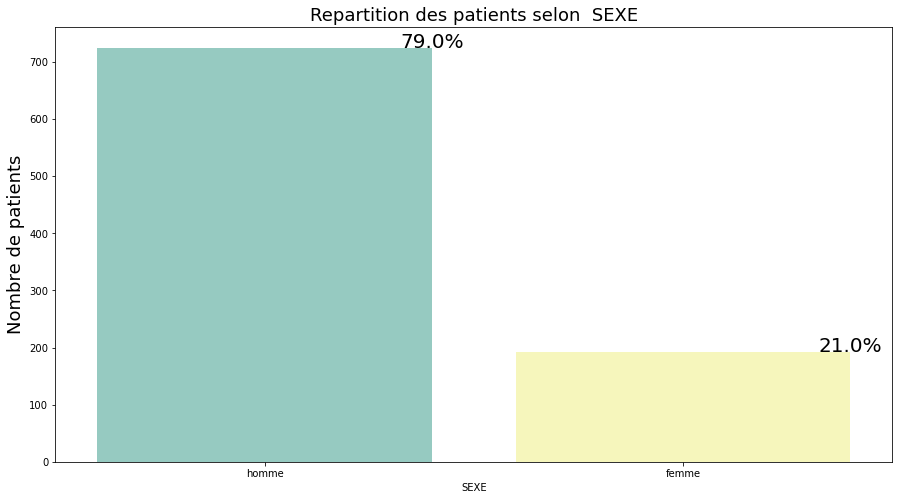

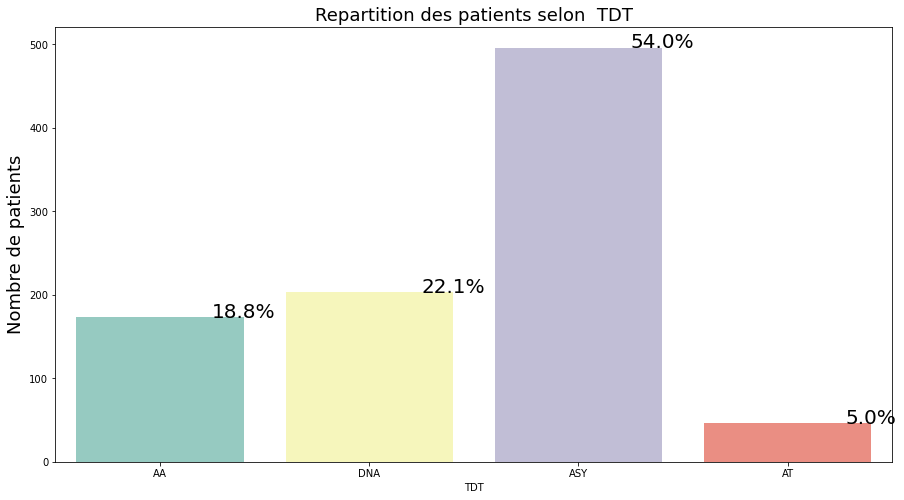

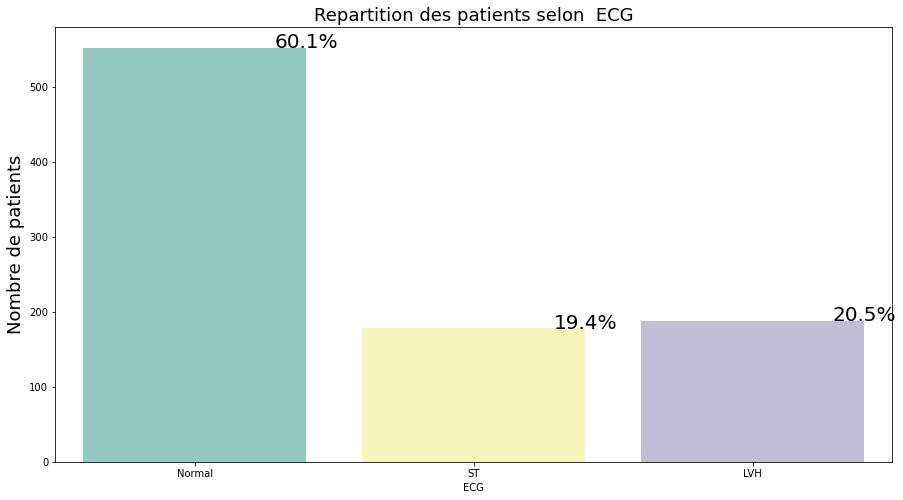

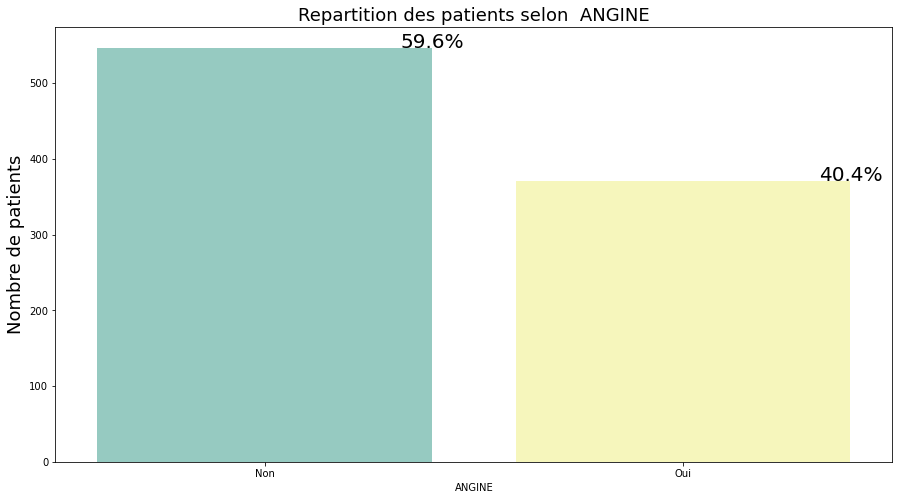

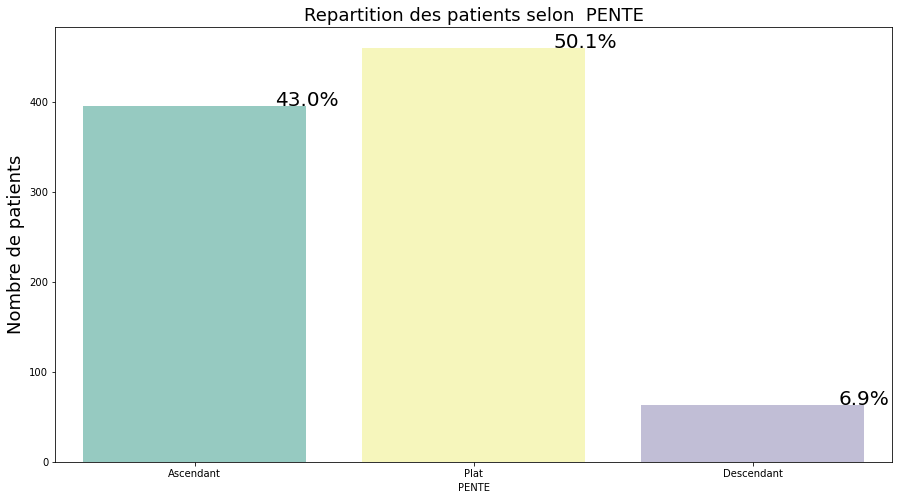

In [11]:
for col in variables_quali:
    
    fig, ax = plt.subplots(figsize=(15, 8), nrows=1, ncols=1)
    
    total = float(len(df))
    ax=sns.countplot(x=col, data=df, palette="Set3")
    ax.set_title('Repartition des patients selon  {}'.format(col), fontsize=18)
    ax.set_ylabel("Nombre de patients", fontsize=18);

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', fontsize=20)
        
    plt.show()

    print(120*'=')

### Interprètation

- La majorité des patients soit 79% issue du jeu de données sont de sexe masculin. Et les 21% restant sont de sexe féminin. Notre population et majoritairement masculine. 

- Plus de la moitié des patients présentent un TDT "asymptomatique" c'est à dire ont une douleur thoracique mais ne présentent pas de symptome. Parmi les 46% restants, 22.1% ont des douleurs non angineuses, 18% ont des douleurs angineuses atypiques et une faible portion de la population soit 5% présentes des douleurs angineuses typiques.

- La majorité des patients, soit environ 60% des individus ont un résultat ECG normal, ECG ST et ECG LVH partagent respectivement les meme pourcentages soit environ 20%.

- 60% des patients présentent une angine et 40% non.

- On observe une pente ST de l'ECG "plat" chez la moitié des patients, dans l'autre moitié, 43% ont une pente ST "Ascendant" et environ 7% une pente "Descendant".

### Visualisation variables catégorielles

In [13]:
variable_cat =["GAJ", "CŒUR"]

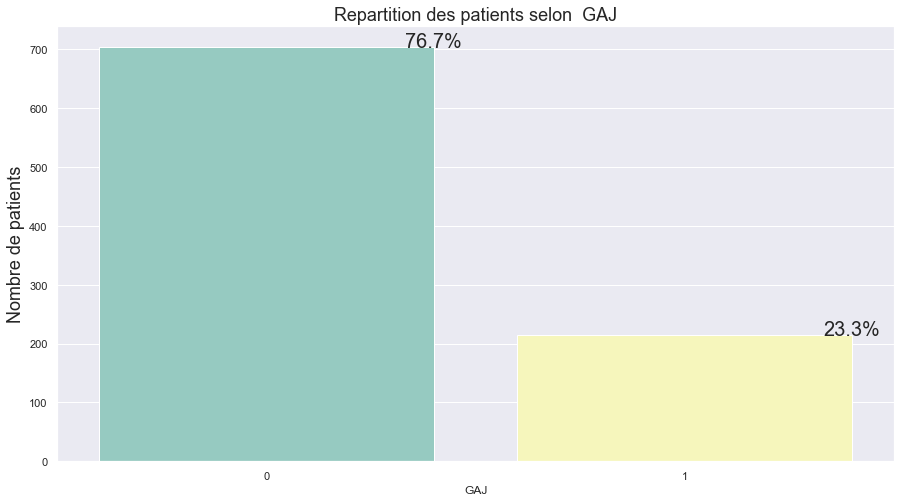

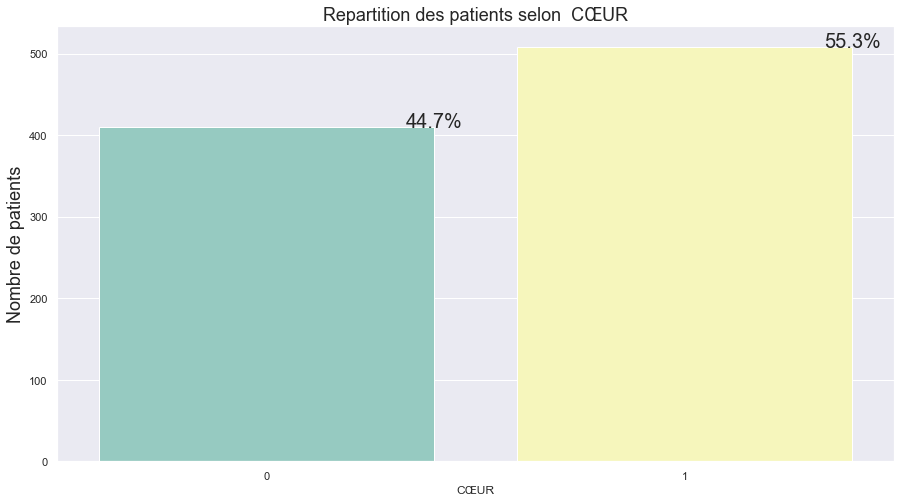

In [14]:
sns.set(style='darkgrid')

for col in variable_cat:
    
    fig, ax = plt.subplots(figsize=(15, 8), nrows=1, ncols=1)
    
    total = float(len(df))
    ax=sns.countplot(x=col, data=df, palette="Set3")
    ax.set_title('Repartition des patients selon  {}'.format(col), fontsize=18)
    ax.set_ylabel("Nombre de patients", fontsize=18);

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', fontsize=20)
        
    plt.show()

    print(120*'=')

### Interprètation

- Une grande majorité des patients soit environ 77% ont une glycémie à jeun <= 120mg/dl et  les 23% restant ont une glycémie à jeune supérieure à ce seuil. Sachant que la Haute autorité de santé parle de diabète lorsque la glycémie à jeun est supérieure à 1.26 g/L, nous pouvons affirmer que les patients dont la glycémie à jeun est supérieure à 120mg/dl (1.2 g/L) approche du diabète ou encore sont diabétique et cet aspect peut influencer sur la présence de maladie cardiaque chez ces patients.

- Au niveau de la variable cible Coeur qui indique la présence ou l'absence de maladies cardiaques, On constate que plus de patients présentent la maladie (54%) et 44.7% ne présentent pas la maladie. On observe au niveau de la variable cible que les classes sont déséquilibrées. Mais le désiquilibre n'est pas important environ 10%.

### Visualisations variables quantitatives

In [15]:
var_quant_cont = df.select_dtypes(include=np.number).drop(columns=variable_cat).columns
var_quant_cont

Index(['AGE', 'PAR', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION'], dtype='object')

In [8]:
## DESCRIPTION VARIABLES QUANTITATIVES A L'EXCEPTION DE LA VARIABLE CIBLE
df.select_dtypes(include=np.number).drop(columns='CŒUR').describe()

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


Repartition des patients selon  AGE


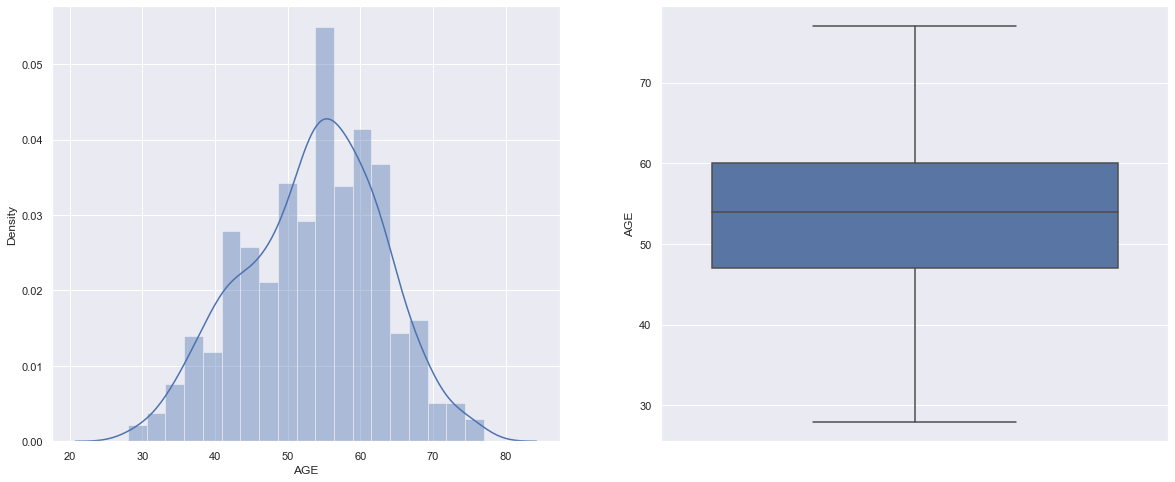

Repartition des patients selon  PAR


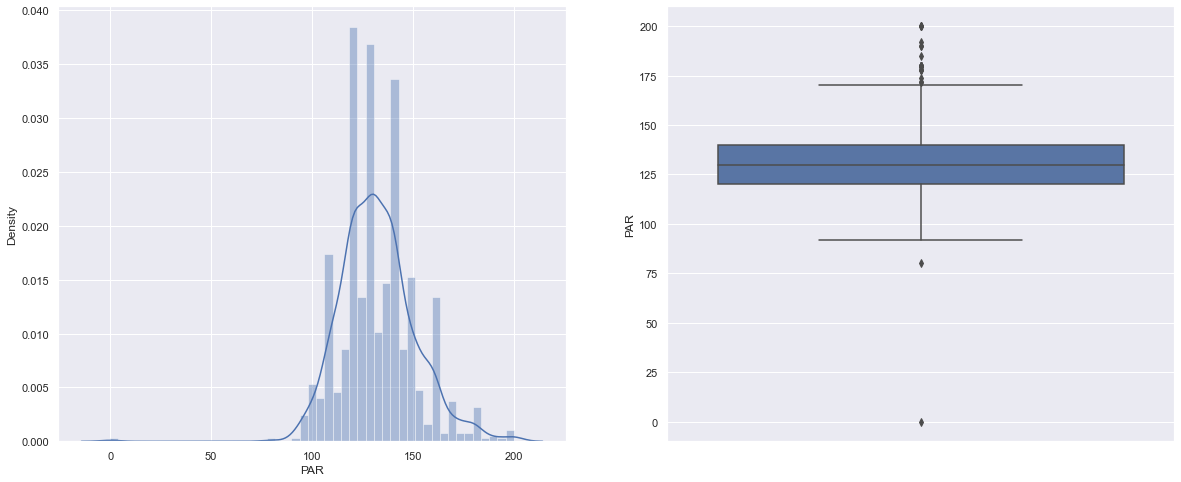

Repartition des patients selon  CHOLESTEROL


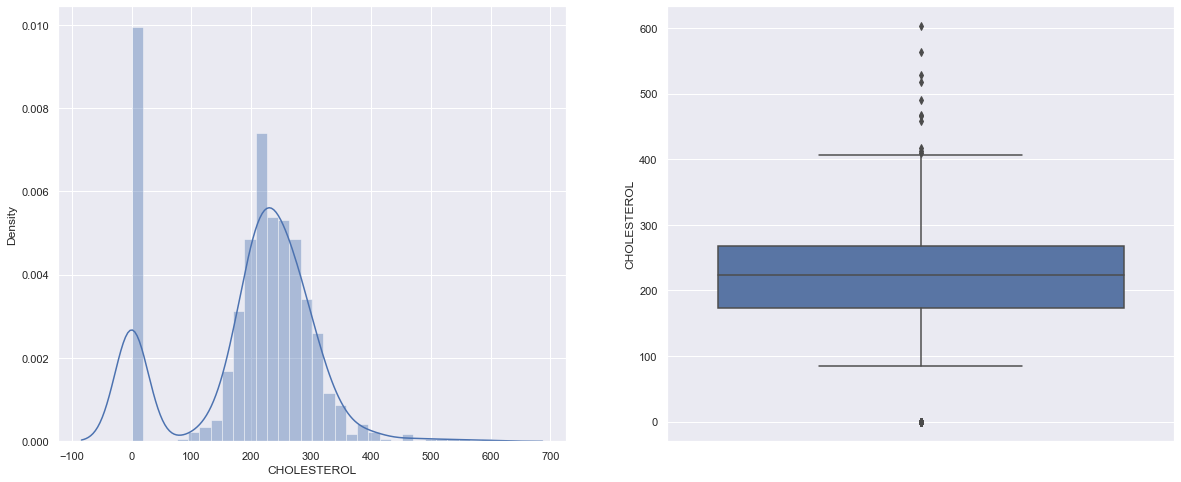

Repartition des patients selon  FCMAX


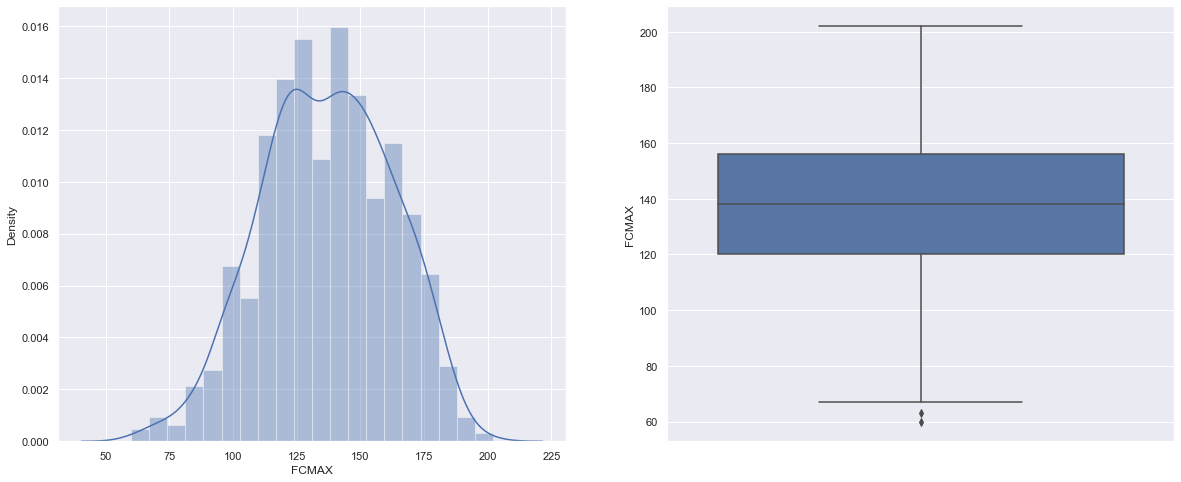

Repartition des patients selon  DEPRESSION


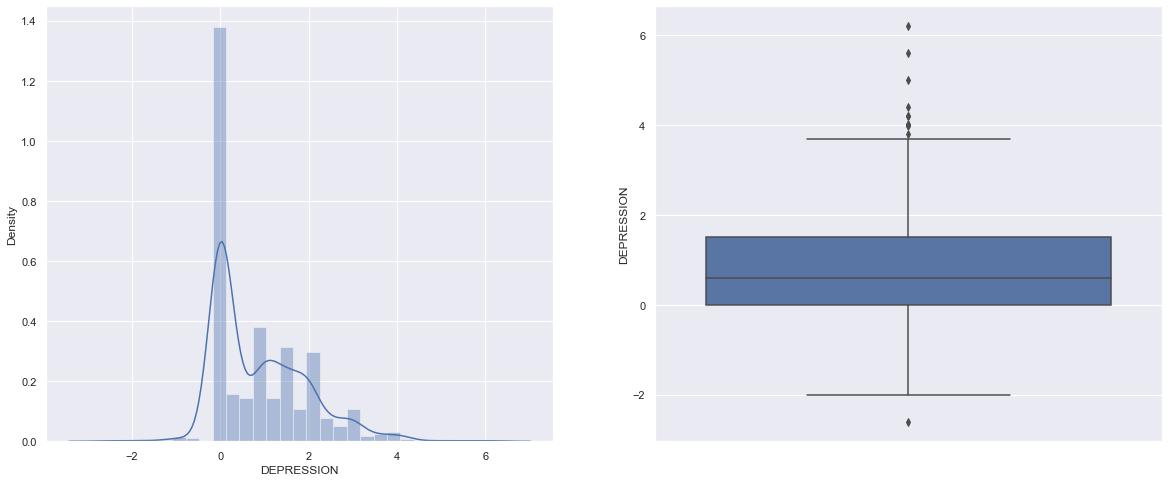

In [16]:
for col in var_quant_cont:
    sns.set(style='darkgrid')
    fig, ax = plt.subplots(figsize=(20, 8), nrows=1, ncols=2)
    
    print('Repartition des patients selon  {}'.format(col))
    
    #print(f'{col :-<50}')
    sns.distplot(df[col], ax=ax[0])
    
    #df[col].plot.hist(ax=ax[0])
    sns.boxplot(y=df[col], ax=ax[1])
    plt.show()
    
    print(120*'=')

 - AGE :
 
 La dispersion des données au niveau de l'AGE s'étend de 25 à environ 78 ans. On observe un pic chez les individus dont l'age est comprise entre 54 et 56 ans. Cela correspond à la classe modale,  c'est à dire que les patients de cette tranche d'ages sont les plus fréquents dans notre dataset. L'on peut dire que, les données de la variable AGE s'ajuste à la loi de distribution normale (mode=mediane et la moyenne est à peu près égale à la médiane environ 54) meme si l'on peut constater un léger ajustement vers la gauche au niveau de cette variable que j'ai jugé pas significative.
 
 ---------------------------------------------------------------------------------------------------------------------------------
 
 - PAR (Pression Artérielle au Repos):
 
  La dispersion des données s'étend de 0 à 200 au niveau de la presion artérielle. La distribution est légèrement étalée vers la droite (Med= 130 et Mean=132.39). L'écart entre le mediane et la moyenne n'étend pas significative, l'on peut dire que la distribution est symétrique. Mais la distribution semble faussée avec un un grand nombre de valeurs aberrantes, les patients ont généralement des pressions artérielles comprisent entre 90 et 170.
  
------------------------------------------------------------------------------------------------------------------------------  
  
  - CHOLESTEROL :
  
  La distribution est faussée, la moyenne (198) est largement supérieure à la médiane (223). Il y a des individus qui admettent un niveau de cholestérol égale à zéro, cette valeur s'écarte des données de la variable CHOLESTEROL.
  
  - FCMAX (Fréquence cardiaque Maximale) : 
  
  La fréquence maximale cardiaque varie entre 60 et 202. Les données de cette variable s'ajuste à peu près à la loi de distribution normale. On observe quelques valeurs aberrantes en dessous de la borne minimale de la boite à moustache.
 
------------------------------------------------------------------------------------------------------------------------------

  - DEPRESSION : 
  Cette variable est étalée vers la droite. Quelques patients qui sont beaucoup dépressif affecte grandement la moyenne.

  
 
 

- Conclusion :

La variable AGE, FCMAX ont une distribution à peu près normale. Pour les autres variables dont la PAR, Le niveau de CHOLESTEROL et la dépression un traitement sur les valeurs abérantes est nécessaire.

### Analyse bivariée

### Quali VS Quali

In [38]:
## Regroupement variables qualitatives et catégorielles (COEUR et GAJ)
var_quali_cat = df.drop(columns=var_quant_cont).columns
var_quali_cat

Index(['SEXE', 'TDT', 'GAJ', 'ECG', 'ANGINE', 'PENTE', 'CŒUR'], dtype='object')

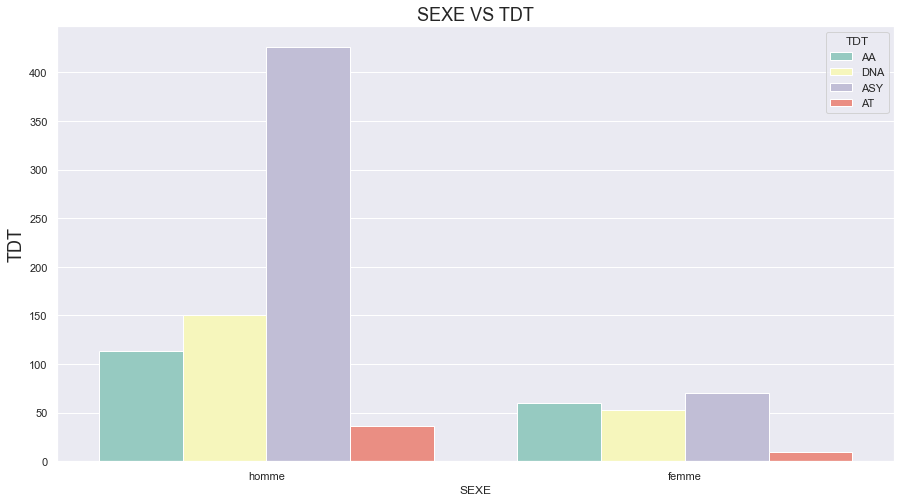

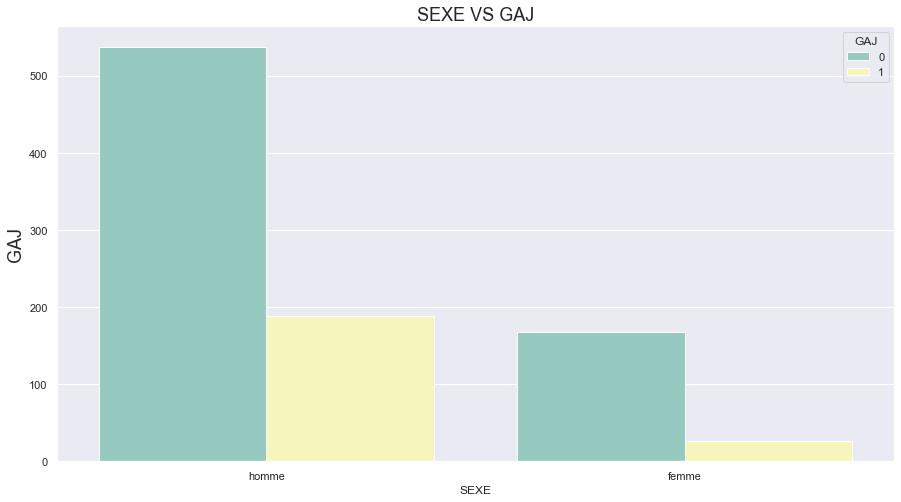

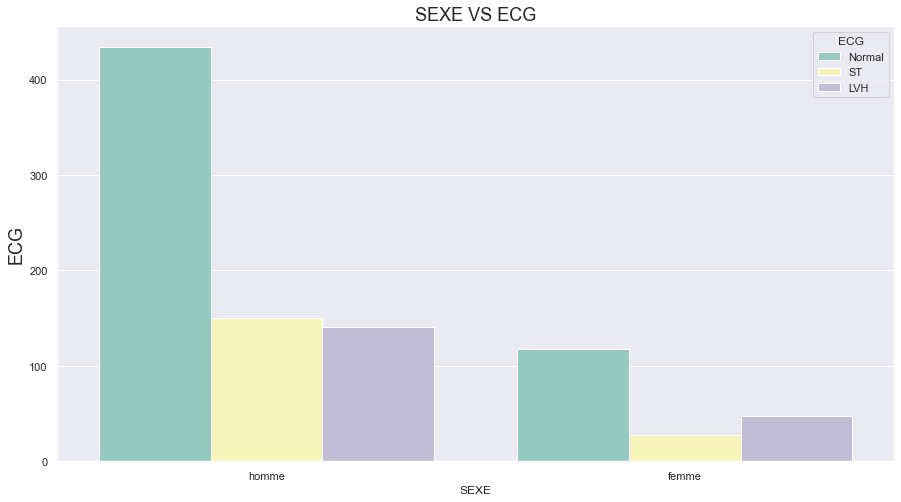

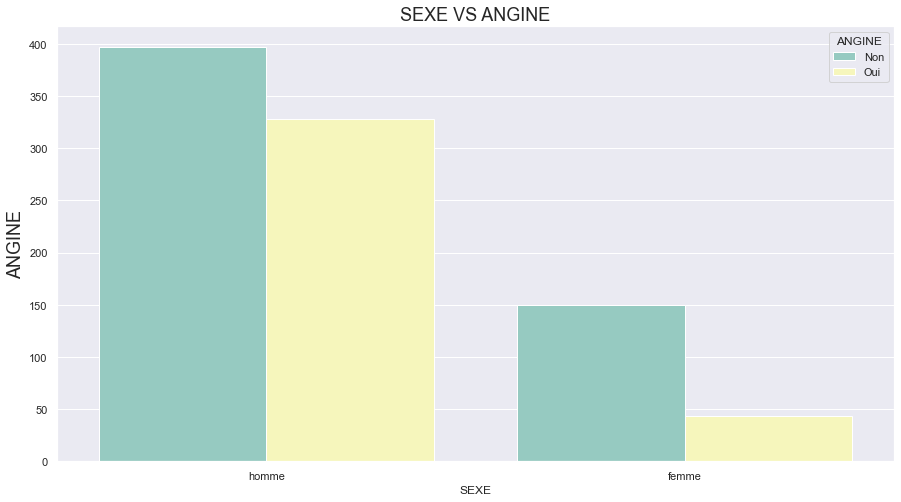

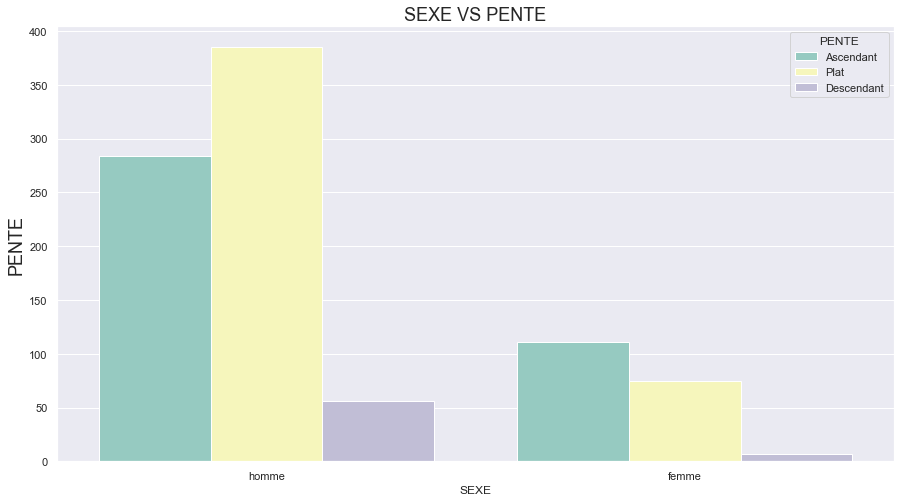

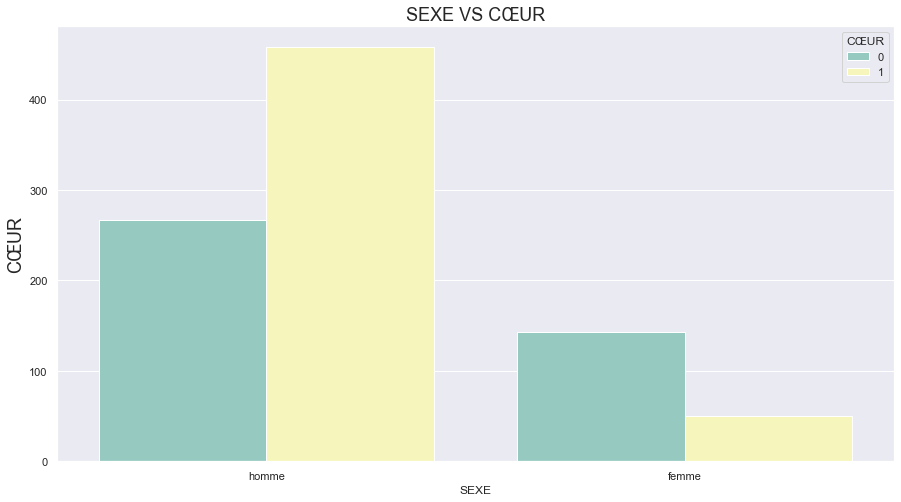

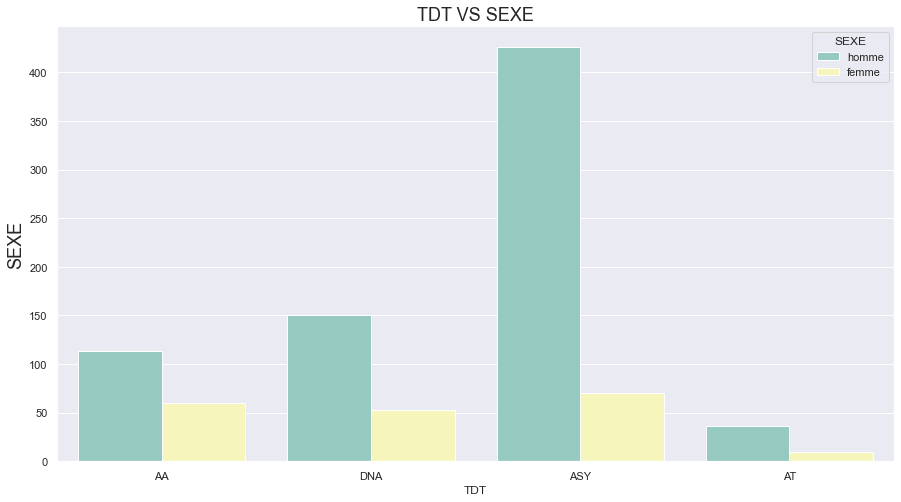

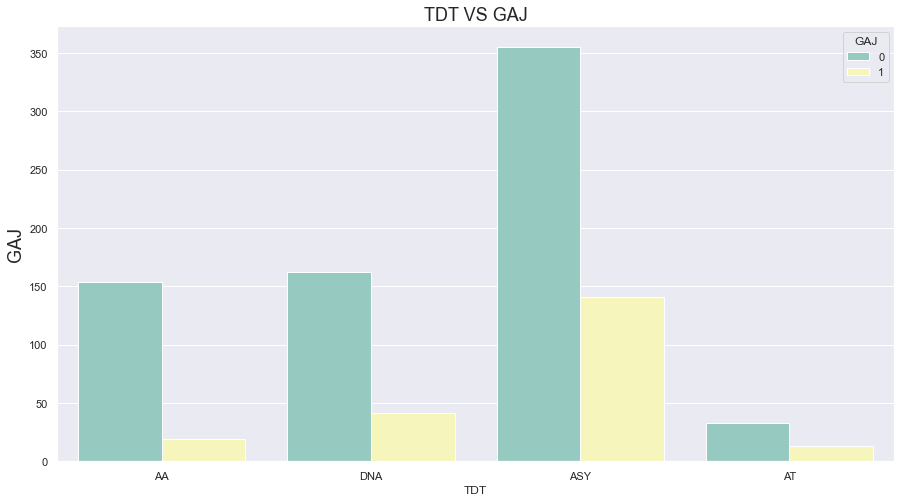

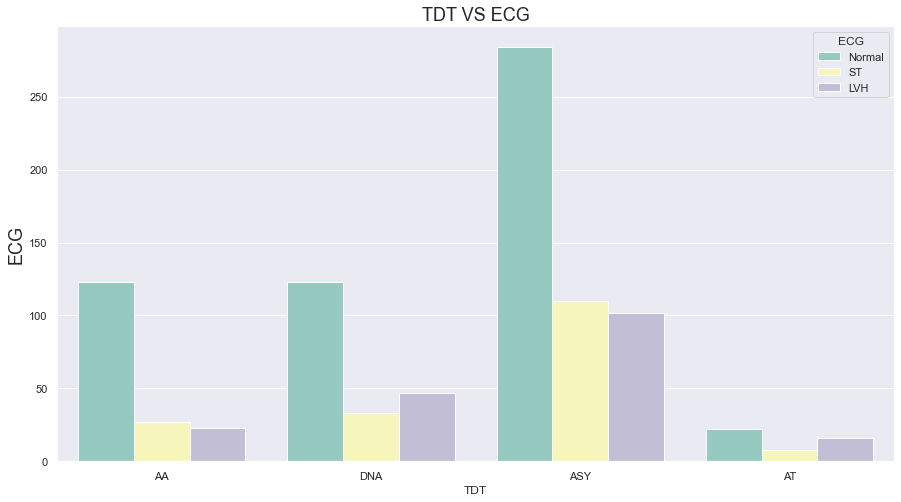

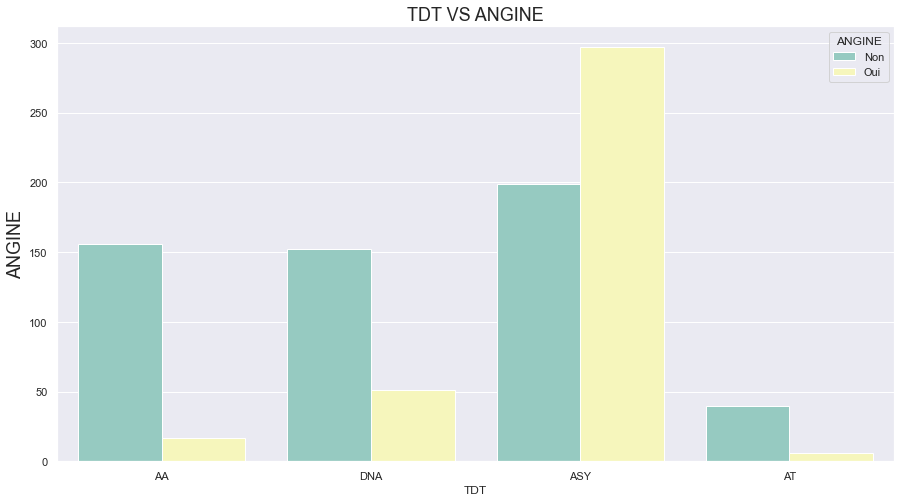

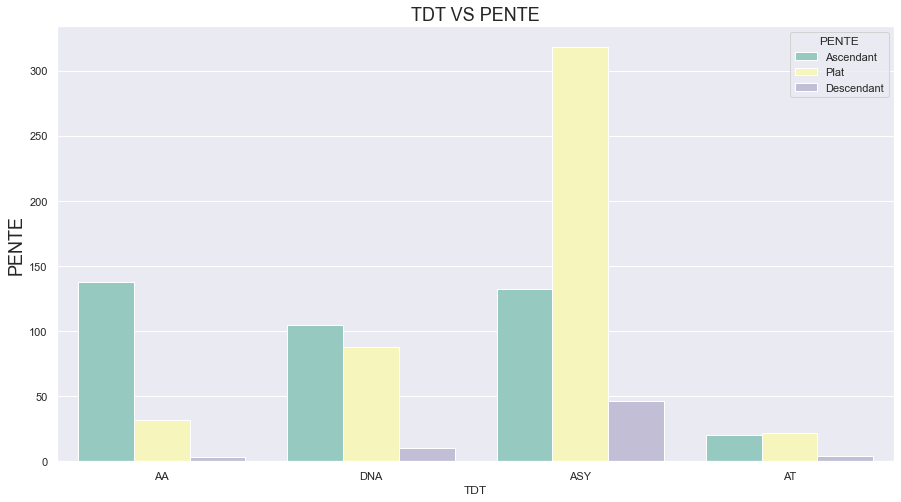

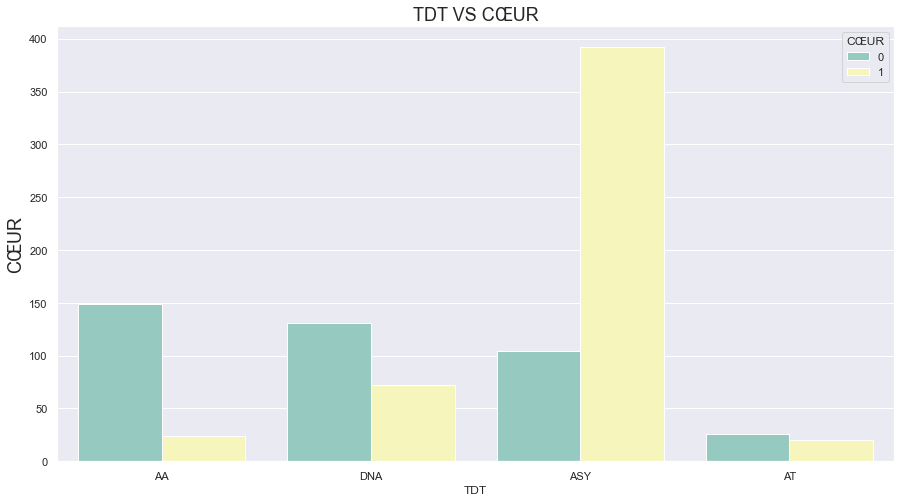

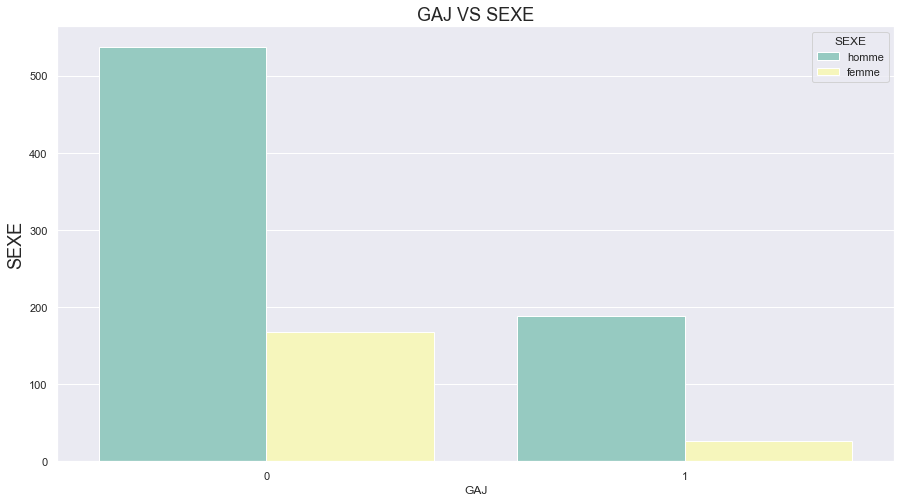

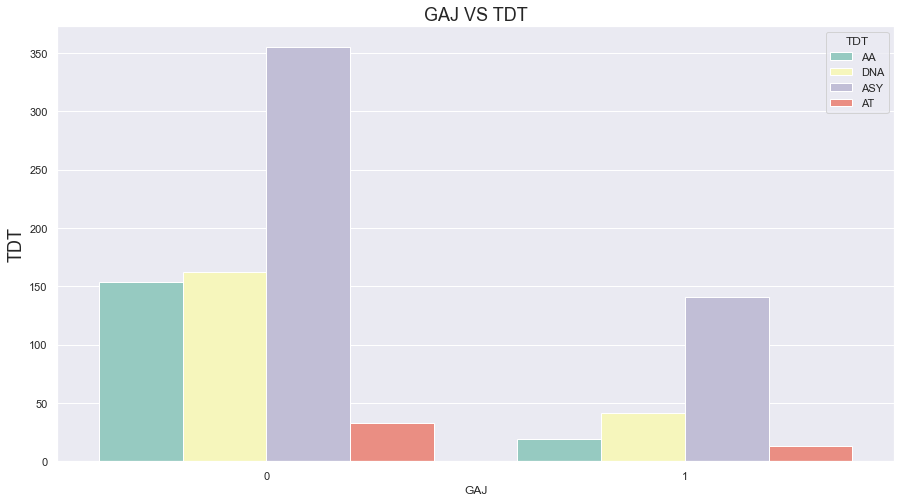

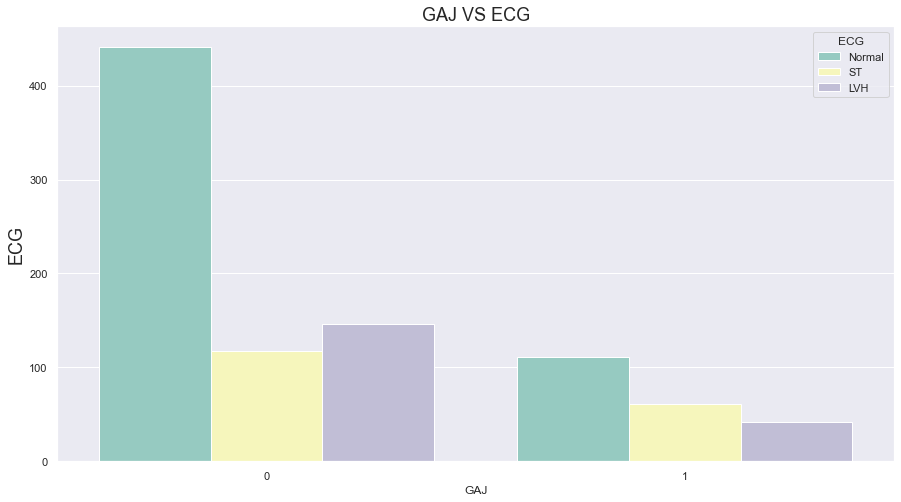

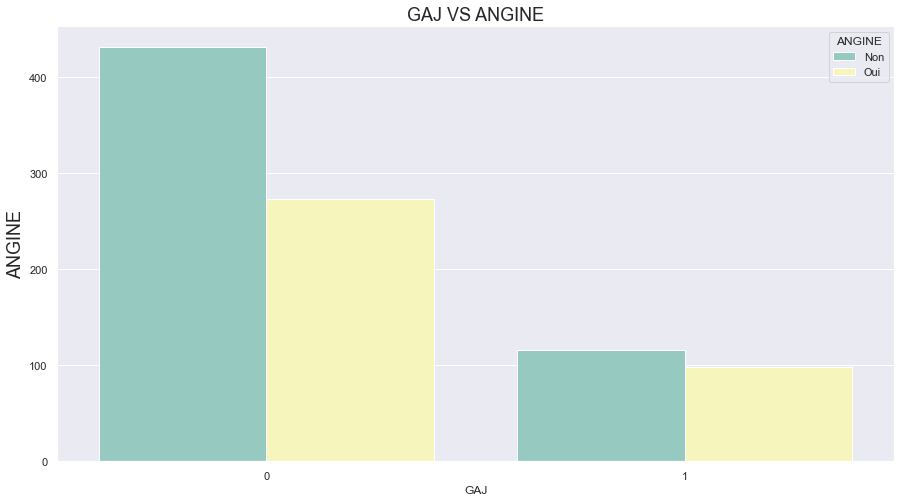

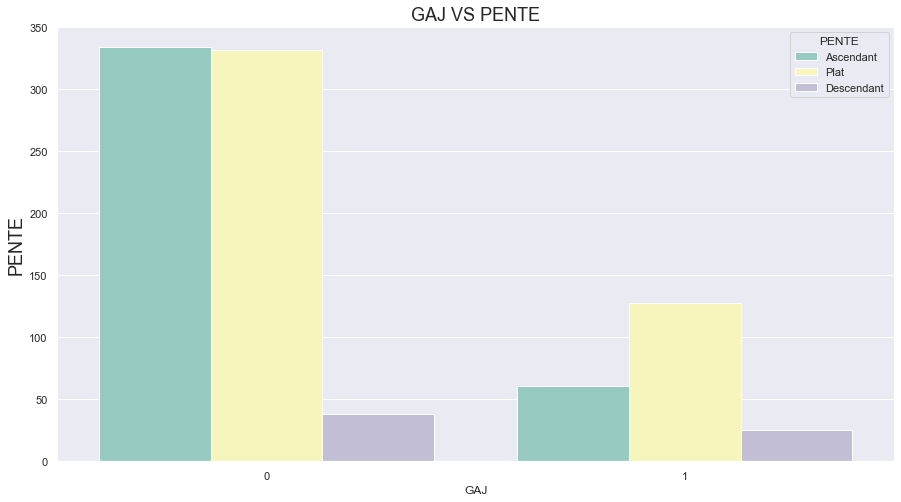

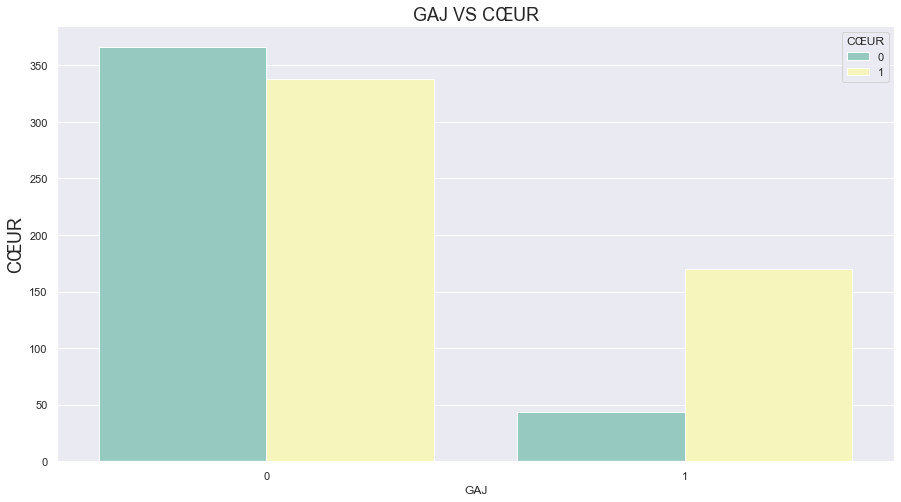

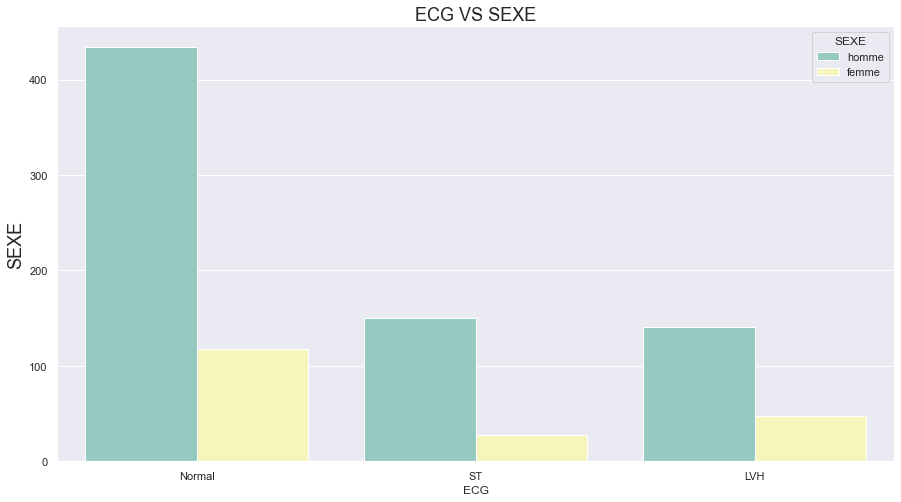

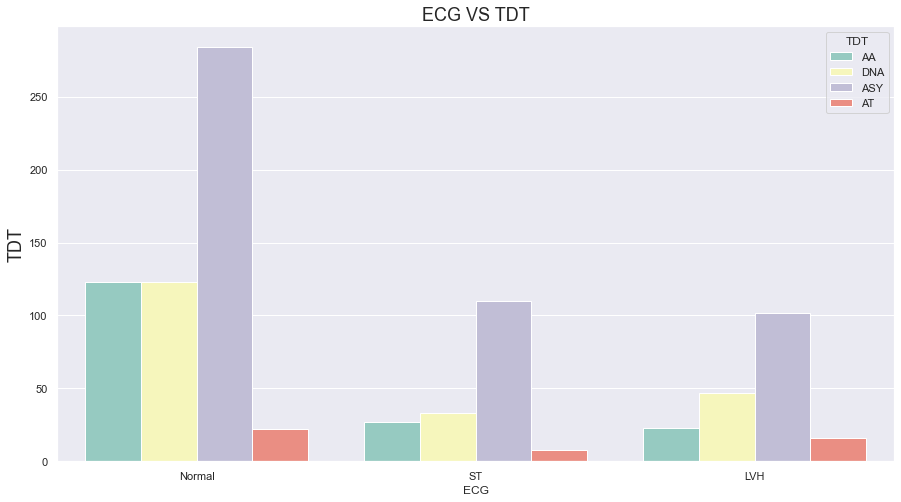

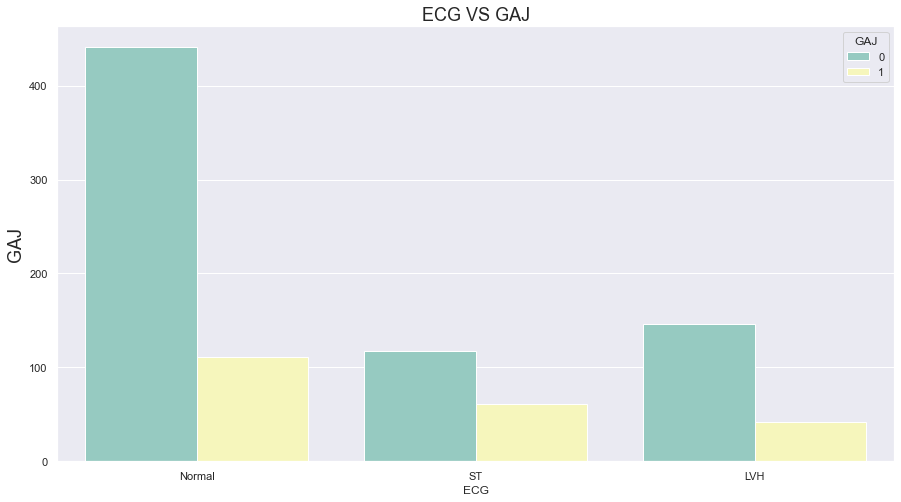

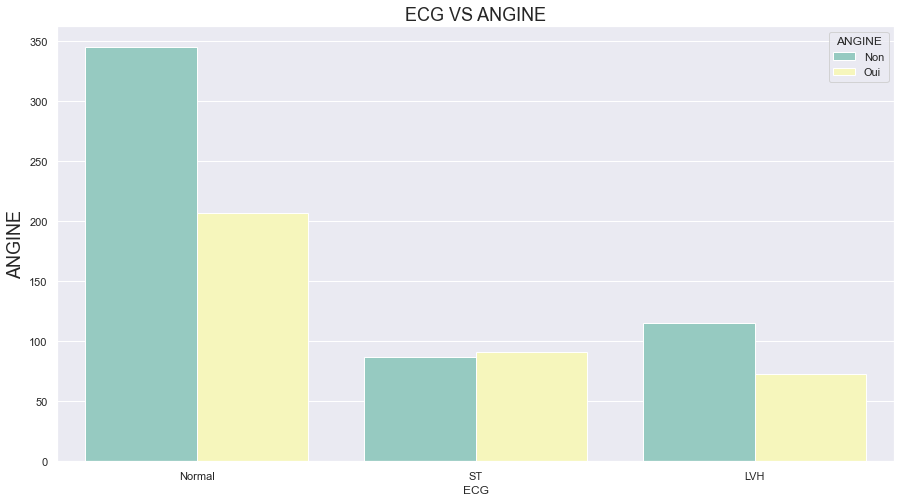

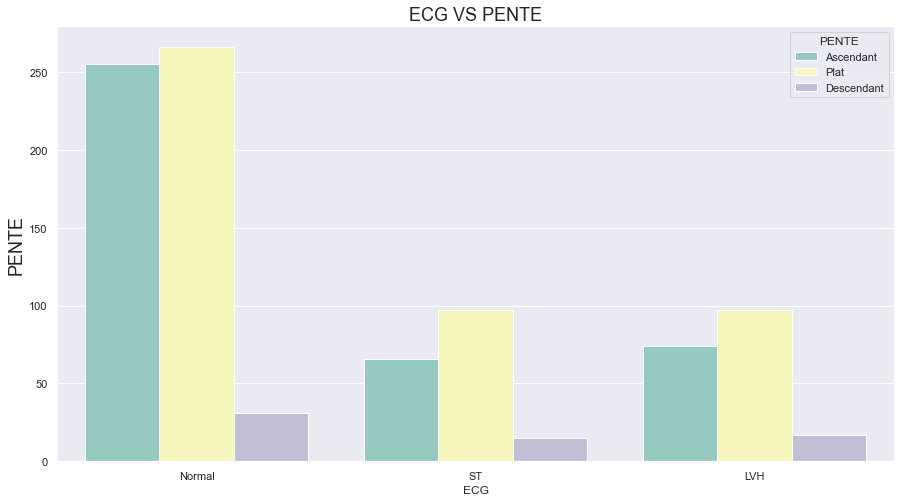

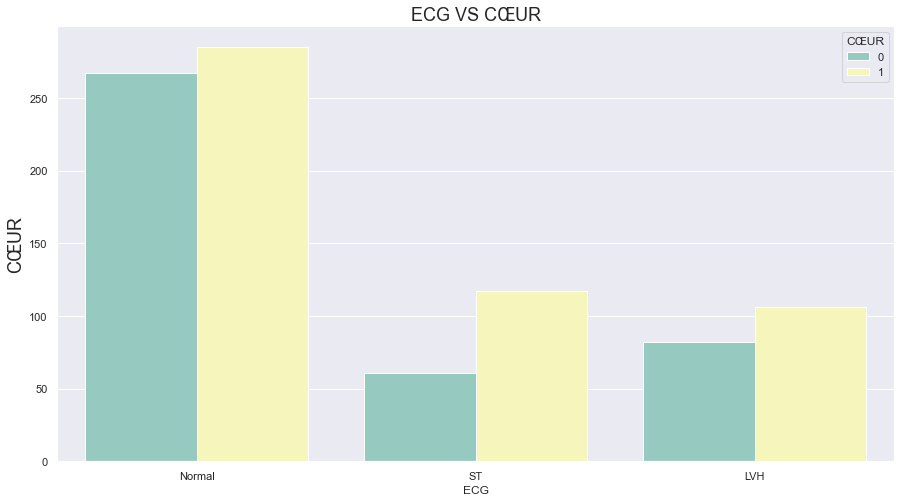

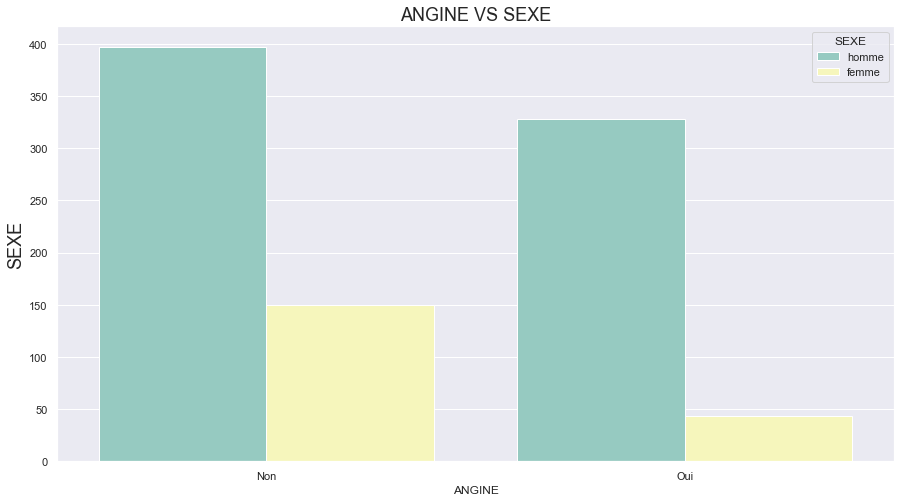

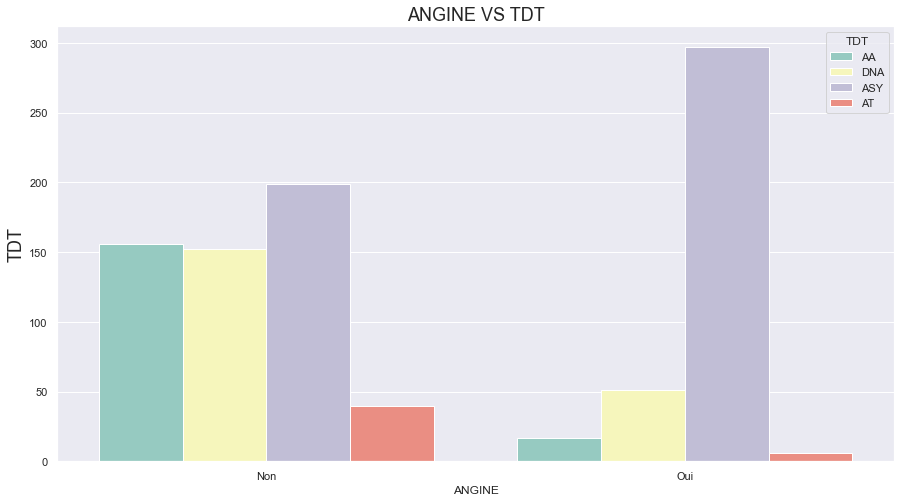

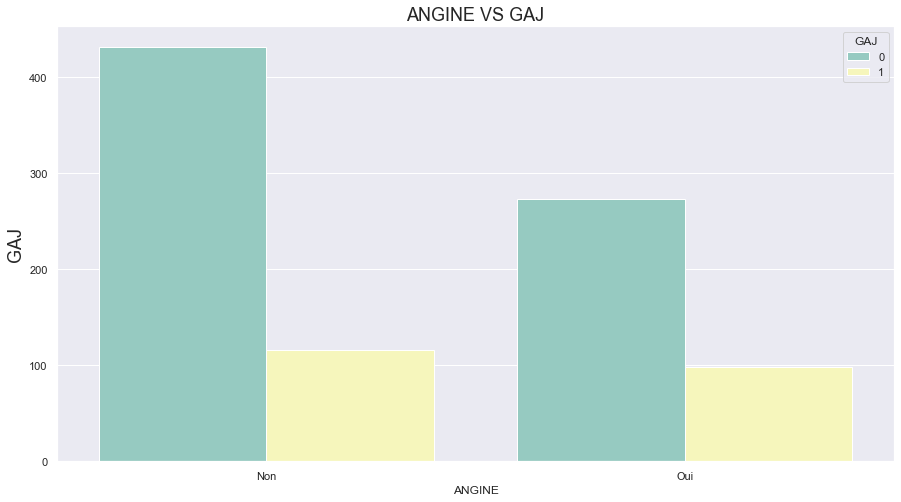

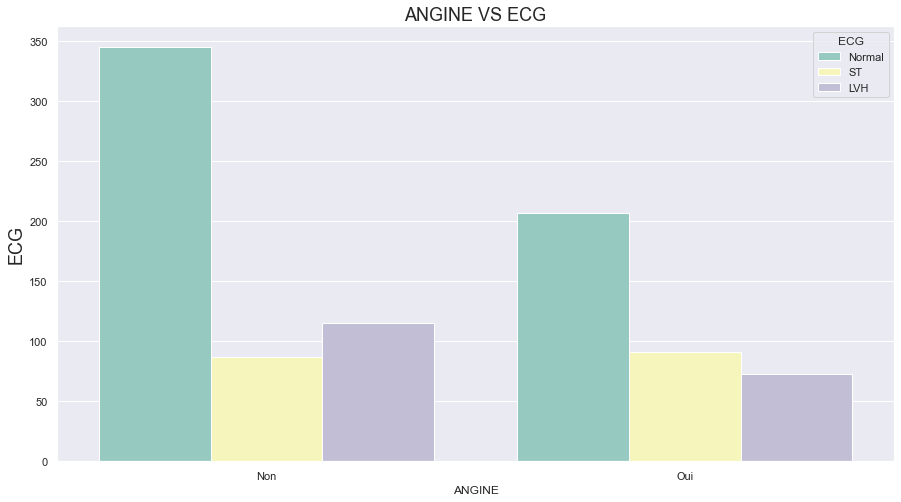

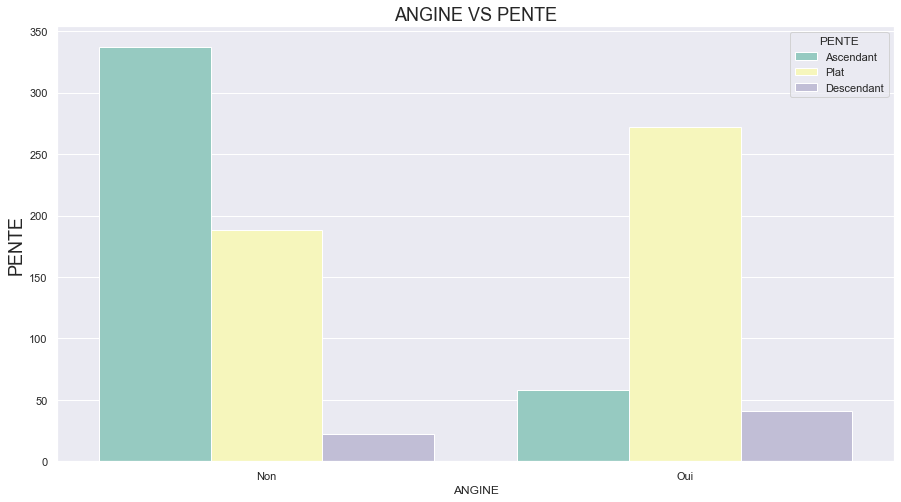

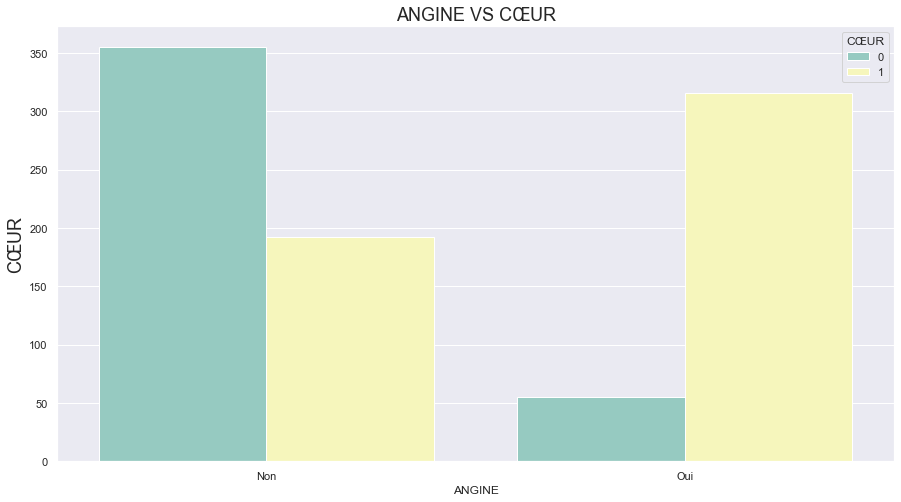

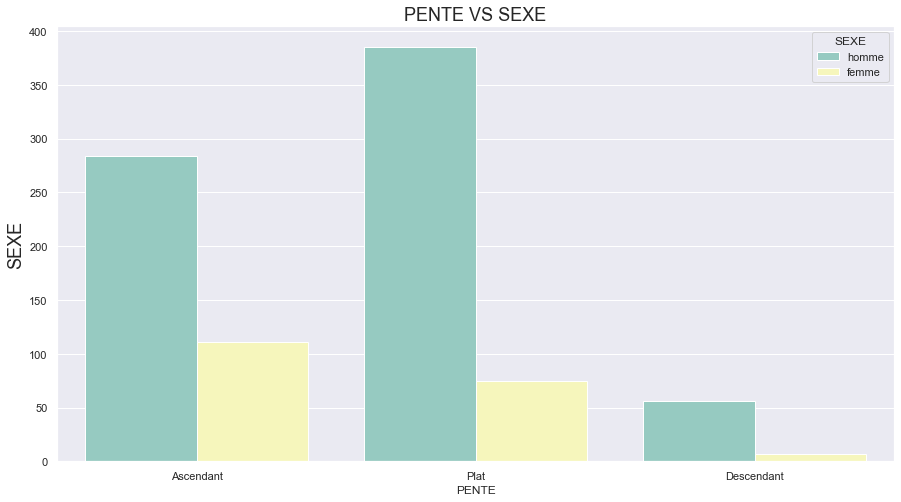

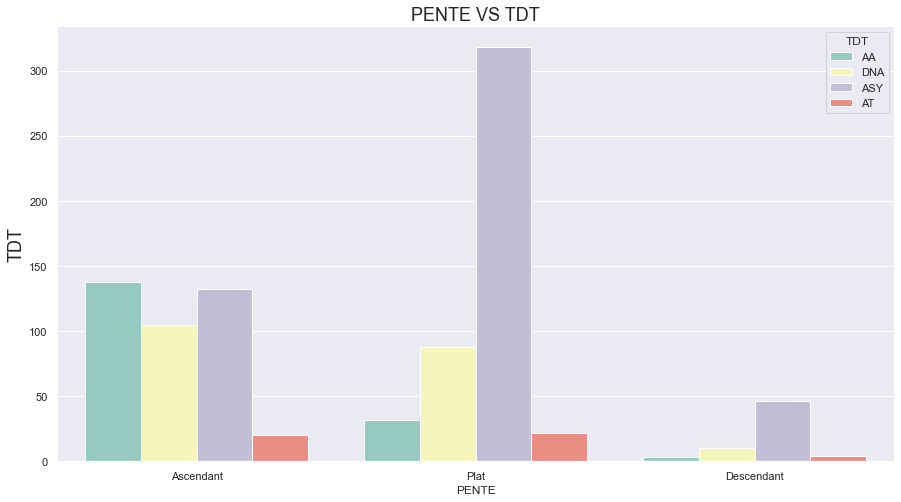

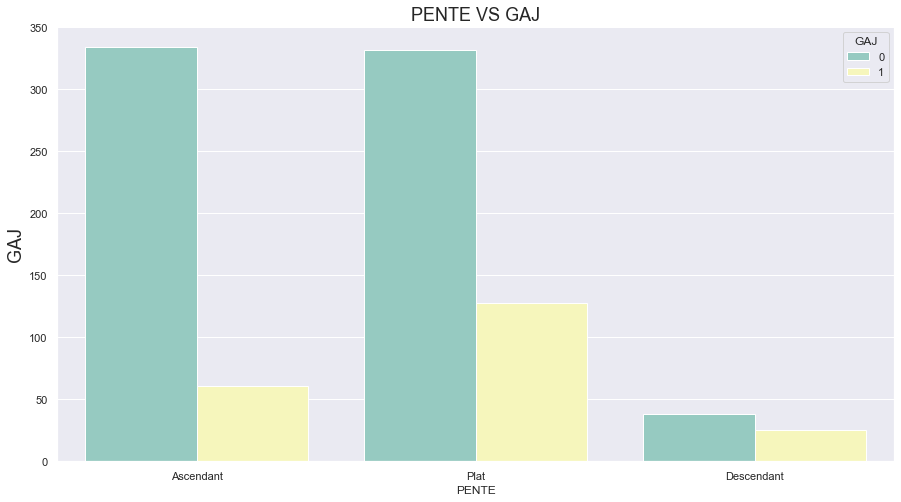

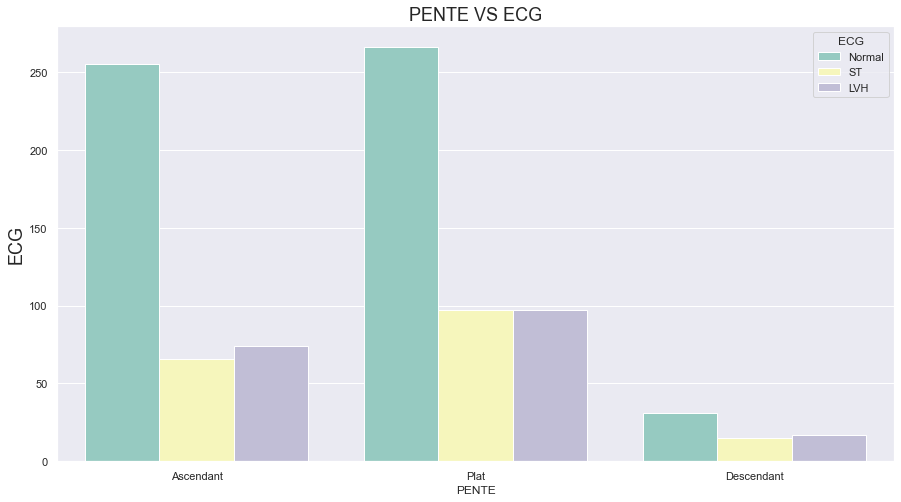

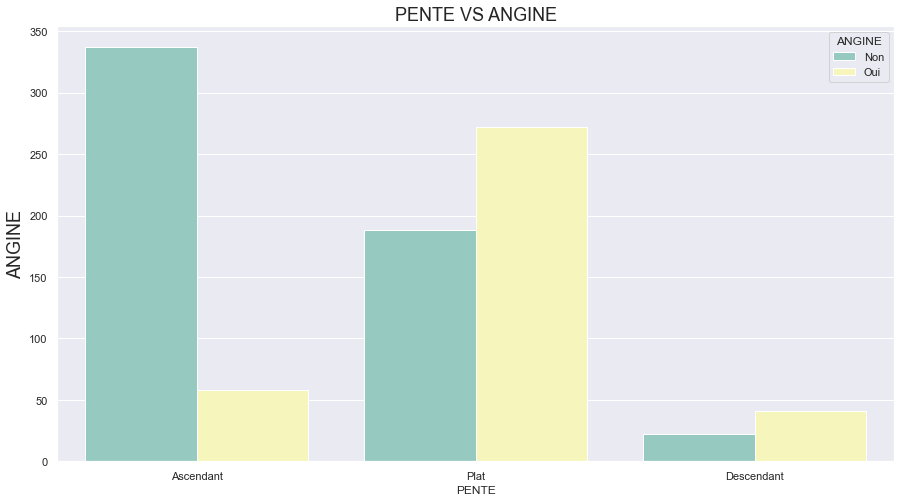

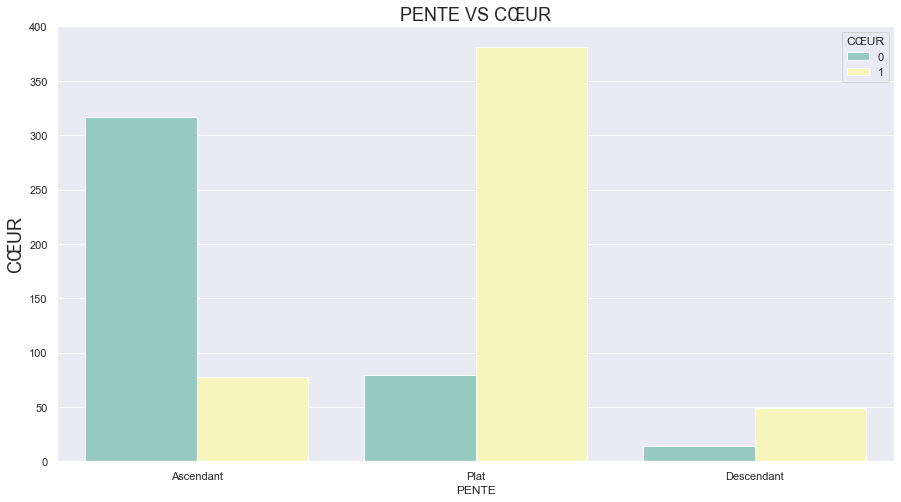

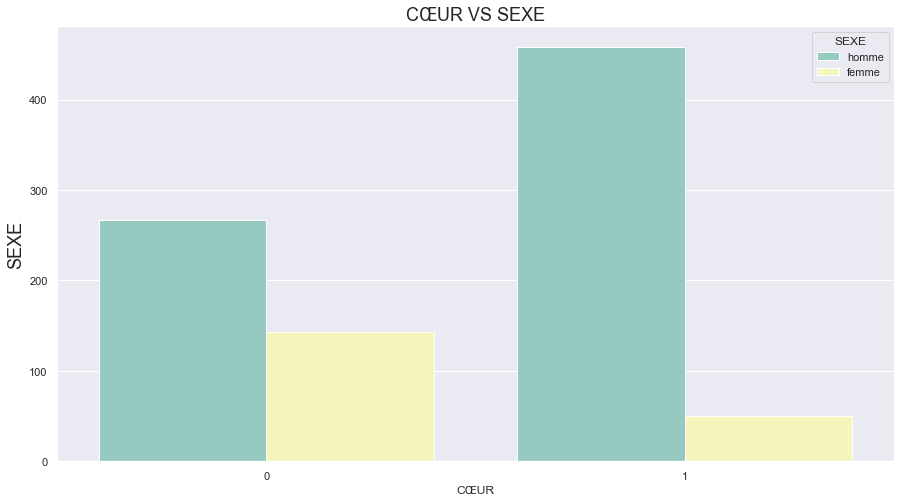

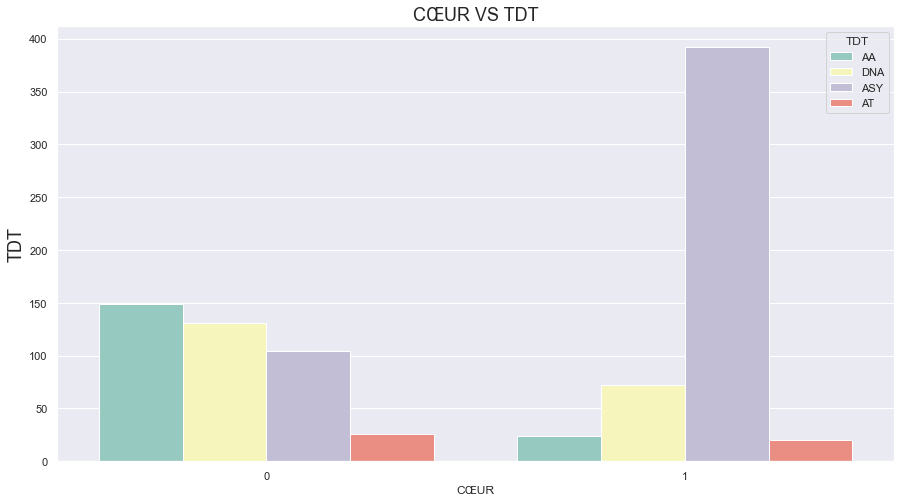

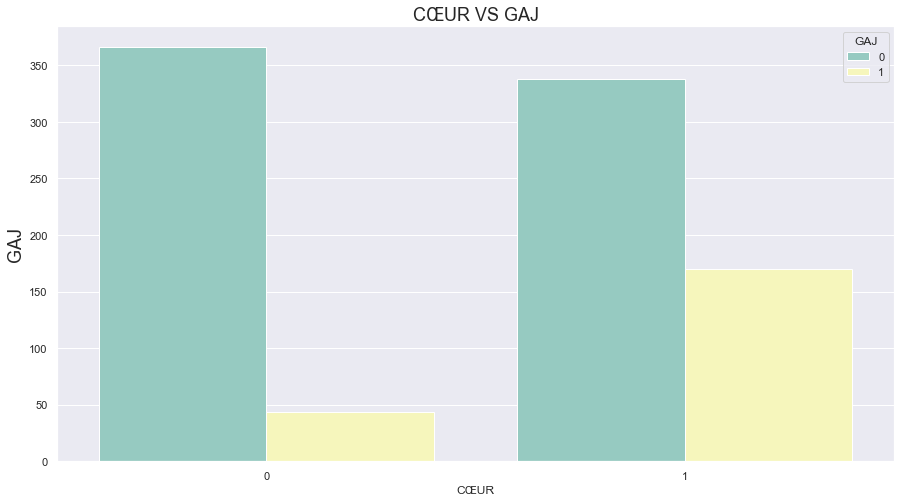

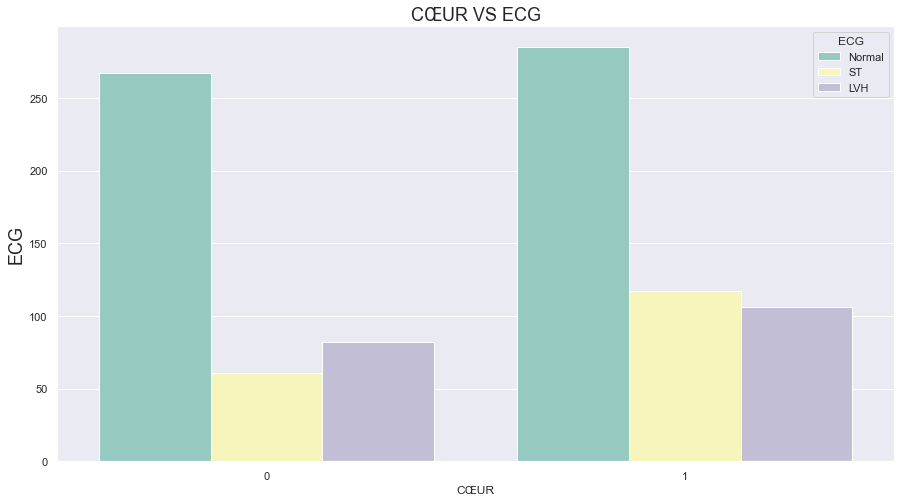

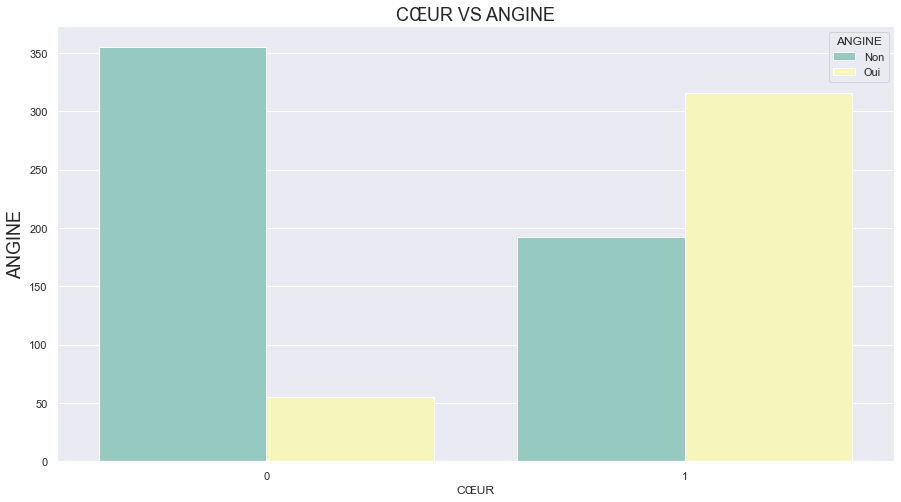

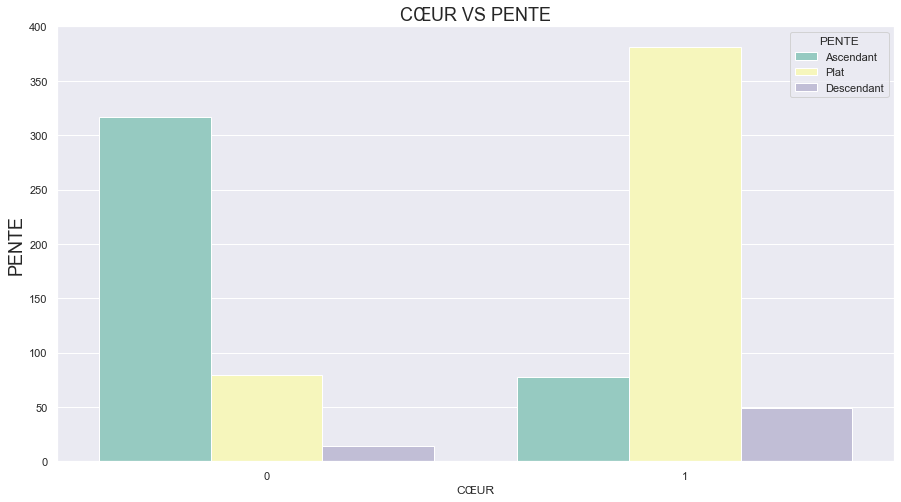

In [43]:
for var1 in var_quali_cat:
    
    for var2 in var_quali_cat:
        
        if var1 != var2:
        
            fig, ax = plt.subplots(figsize=(15, 8), nrows=1, ncols=1)



            ax = sns.countplot(x=var1, hue=var2, data=df, palette="Set3")
            ax.set_title('{} VS {}'.format(var1, var2), fontsize=18)
            ax.set_ylabel("{}".format(var2), fontsize=18);
        


### Analyse et Interprètation

In [45]:
# from scipy.stats import chi2_contingency as chi2_contingency
# for i in  df.select_dtypes(object):
#     for j in df.select_dtypes(object):
#         if i != j:
#             matrice = pd.crosstab(df[i], df[j])
#             khi2, pval , ddl , contingent_theorique = chi2_contingency(matrice)
#             print(matrice)
#             print(pval)
#             print('')
#             print('')

# from scipy.stats import personr


### Quanti VS Quanti

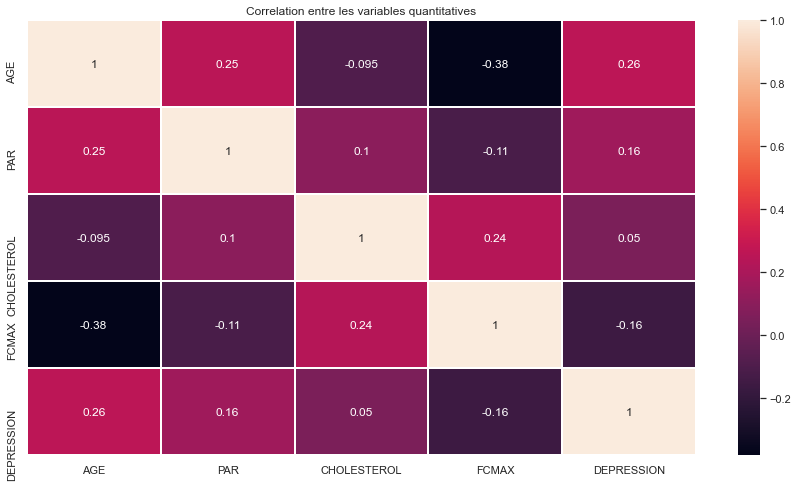

In [48]:
plt.figure(figsize=(15,8))
heat_map = sns.heatmap(df[var_quant_cont].corr(), linewidth = 1 , annot = True)
plt.title( "Correlation entre les variables quantitatives" )
plt.show()

La carte thermique nous montre qu'il n'existe pas de corrélations linéaires significatives entre les variables quantitatives |corr|<0.4 . Calculons la P_value du test de Pearsonr pour valider les résultats. 

In [59]:
from scipy.stats import pearsonr

for var1 in var_quant_cont:
    for var2 in var_quant_cont:
        if var1 != var2:
            print(f"{var1} et {var2} : {pearsonr(df[var1], df[var2])}")
            print(120*'=')

AGE et PAR : (0.25439935615154485, 5.0147697437822694e-15)
AGE et CHOLESTEROL : (-0.09528177118121894, 0.0038580710435994576)
AGE et FCMAX : (-0.3820446750319705, 2.8411217807772657e-33)
AGE et DEPRESSION : (0.2586115360187564, 1.7109931707675088e-15)
PAR et AGE : (0.25439935615154485, 5.0147697437822694e-15)
PAR et CHOLESTEROL : (0.10089294207709178, 0.00220928037303228)
PAR et FCMAX : (-0.11213499711297986, 0.0006649560771571509)
PAR et DEPRESSION : (0.164803043171389, 5.144255126696753e-07)
CHOLESTEROL et AGE : (-0.09528177118121894, 0.0038580710435994576)
CHOLESTEROL et PAR : (0.10089294207709178, 0.00220928037303228)
CHOLESTEROL et FCMAX : (0.235792403002385, 4.597229278316862e-13)
CHOLESTEROL et DEPRESSION : (0.050148109140804045, 0.12893919909478516)
FCMAX et AGE : (-0.3820446750319705, 2.8411217807772657e-33)
FCMAX et PAR : (-0.11213499711297986, 0.0006649560771571509)
FCMAX et CHOLESTEROL : (0.235792403002385, 4.597229278316862e-13)
FCMAX et DEPRESSION : (-0.1606905500499245, 